Tal Melnikov: 206961377

Omri Chen Yosef : 311148720

In [2]:
import nltk
import pandas as pd
from collections import Counter
import re
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import requests
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
import contractions
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,SimpleRNN
from transformers import pipeline
import matplotlib.pyplot as plt
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


c:\Users\talme\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\talme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\talme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
with open("data.txt","r",encoding='utf-8') as file:
    text=file.read()

In [4]:
def normalize_text(text):
    text=text.lower()
    text = contractions.fix(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [5]:
sentences=sent_tokenize(text)
normalized_sentences = [normalize_text(sentence) for sentence in sentences]
for sentence in normalized_sentences:
    print(sentence)

israeli prime minister benjamin netanyahu said sunday “intense phase war hamas gaza end” military’s focus could shift israel’s northern border lebanon fighting iranbacked group hezbollah intensified recent week
netanyahu however vowed israel would continue operating gaza militant group hamas eliminated
“it mean war going end war current stage going end rafah
true
continue mowing grass later” netanyahu told channel 14 television first oneonone interview local israeli medium since october 7
million palestinian taking shelter rafah israel started air ground operation southern gazan city defying call international community proceed
around 800000 people since displaced rafah condition described united nation food agency “apocalyptic” city’s border crossing egypt — vital entry point humanitarian aid — remained closed since israeli military seized early last month
international pressure israel’s action gaza mounted since started operation rafah
last month un’s top court ordered israel immedia

In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(normalized_sentences)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df)


         120      1200        14        18      2024        21       250  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.251239  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(normalized_sentences)
total_words = len(tokenizer.word_index) + 1
input_sequences = []
for line in normalized_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    


In [8]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


In [9]:
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [10]:
# Create RNN model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(SimpleRNN(150))
model.add(Dense(total_words, activation='softmax'))


c:\Users\talme\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_sequence_len-1))


In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 46, 100)        │        44,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 150)            │        37,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 443)            │        66,893 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,843 (581.42 KB)

 Trainable params: 148,843 (581.42 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Train the model
history = model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0068 - loss: 0.5209
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 6.2576e-04 - loss: 0.0455
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0034 - loss: 0.0205
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0275 - loss: 0.0178
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0268 - loss: 0.0168
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0318 - loss: 0.0163
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0297 - loss: 0.0159
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0236 - loss: 0.0157
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0366 - loss: 0.0155
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0339 - loss: 0.0155


In [14]:
ls_model = Sequential()
ls_model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
ls_model.add(LSTM(150))
ls_model.add(Dense(total_words, activation='softmax'))

ls_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ls_model.build(input_shape=(None, max_sequence_len-1))
print(ls_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 46, 100)        │        44,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 443)            │        66,893 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,793 (1022.63 KB)

 Trainable params: 261,793 (1022.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:

history = ls_model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0111 - loss: 6.0920
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.0195 - loss: 5.9622
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0269 - loss: 5.7634
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0362 - loss: 5.7209
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0325 - loss: 5.7355
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0237 - loss: 5.5853
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0328 - loss: 5.5038
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0280 - loss: 5.2755
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0432 - loss: 5.0844
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0526 - loss: 4.9463


In [16]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word = tokenizer.index_word[np.argmax(predicted)]
    return predicted_word

# Example usage
seed_text = "netanyahu said"
#predict with RNN
next_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
print(f"Next word prediction: {next_word}")
#predict with LSTM
next_word = predict_next_word(ls_model, tokenizer, seed_text, max_sequence_len)
print(f"Next word prediction: {next_word}")



Next word prediction: war
Next word prediction: war


Comparing the Predictive Performance of RNN and LSTM Models
Findings from the results:

Accuracy: Both models had low accuracy, with the LSTM slightly outperforming the RNN.
Loss: The RNN had a lower final loss, but this did not translate to higher accuracy, possibly indicating overfitting or insufficient complexity.
Model Complexity: LSTMs, designed to handle long-term dependencies, showed better learning capability, though at a higher computational cost.

KL- Sum Algorithm

In [17]:
# Function to calculate word frequencies
def calculate_word_frequencies(text):
    words = re.findall(r'\w+', text.lower())
    return Counter(words)

# Calculate word frequencies for the entire text
word_frequencies = calculate_word_frequencies(text)

# Function to score sentences based on word frequencies
def score_sentences(sentences, word_frequencies):
    sentence_scores = {}
    for sentence in sentences:
        words = re.findall(r'\w+', sentence.lower())
        sentence_score = sum(word_frequencies[word] for word in words)
        sentence_scores[sentence] = sentence_score
    return sentence_scores

# Score the sentences
sentence_scores = score_sentences(sentences, word_frequencies)

# Sort sentences by score and select the top 5
ranked_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
summary = ' '.join(ranked_sentences[:5])
print('\n'.join(summary.split('.')))

Last month, the UN’s top court ordered Israel to immediately halt its controversial military operation there, calling the humanitarian situation “disastrous
”

Netanyahu also weighed in on the ongoing negotiations to end the war, saying he was ready to make “a partial deal” with Hamas to return some hostages still being held captive in Gaza, but reiterating his position that the war will still continue after a ceasefire “to achieve the goal of eliminating” Hamas
 “The end of the fighting in the Gaza Strip, without the release of the hostages, is an unprecedented national failure and a failure to meet the goals of the war,” the Forum said in a statement on Monday
 Hamas continues to insist that any agreement include, “a clear affirmation of a permanent ceasefire and a complete withdrawal from the Gaza Strip
”

Shifting north
Netanyahu also told Channel 14 Television that “after the end of the intense phase, we will have the possibility to shift some of the power north, and we will do it

GPT-2 language model

In [18]:
# Load pre-trained model and tokenizer
model_name = 'gpt2'
model = TFGPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [19]:
def generate_text(model, tokenizer, prompt, max_length=50):
    inputs = tokenizer.encode(prompt, return_tensors='tf')
    outputs = model.generate(inputs, max_length=max_length, num_return_sequences=1)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Partial sentences
partial_sentences = [
    "Netanyahu has come under increasing pressure from",
    "In response to the prime minister’s comments,",
    "Netanyahu’s positions are a clear confirmation of",
    "Hamas continues to insist that any agreement include",
    "The end of the fighting in the Gaza Strip"
]


In [20]:
completions = [generate_text(model, tokenizer, sentence) for sentence in partial_sentences]
for i, completion in enumerate(completions, 1):
    print(f"{i}. {completion}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

1. Netanyahu has come under increasing pressure from the right to demand that the United States withdraw from the Paris climate accord.

The United States has been a major player in the negotiations, and has been a key player in the negotiations.

The
2. In response to the prime minister’s comments, the government said it would "continue to work with the government to ensure that the law is followed".

The government said it would also "continue to work with the government to ensure that the
3. Netanyahu’s positions are a clear confirmation of his position on the issue.

The Israeli prime minister has been in the spotlight for his support for the Palestinian Authority, which he has called a "terrorist organization" and a "terrorist state
4. Hamas continues to insist that any agreement include a Palestinian state.

"The Palestinian Authority has no right to unilaterally decide to establish a state in the West Bank and Gaza Strip," Hamas spokesman Sami Abu Zuhri said.

"
5. The end of th

In [21]:
sentiment_analysis = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [22]:
sentiments = [sentiment_analysis(sentence)[0] for sentence in sentences]

In [23]:
sentiment_counts = {'POSITIVE': 0, 'NEGATIVE': 0, 'NEUTRAL': 0}

for sentiment in sentiments:
    if sentiment['label'] == 'POSITIVE':
        sentiment_counts['POSITIVE'] += 1
    elif sentiment['label'] == 'NEGATIVE':
        sentiment_counts['NEGATIVE'] += 1
    else:
        sentiment_counts['NEUTRAL'] += 1

total_sentences = len(sentences)
percentages = {k: (v / total_sentences) * 100 for k, v in sentiment_counts.items()}


Total sentences: 49
Positive sentences: 26.53%
Negative sentences: 73.47%
Neutral sentences: 0.00%


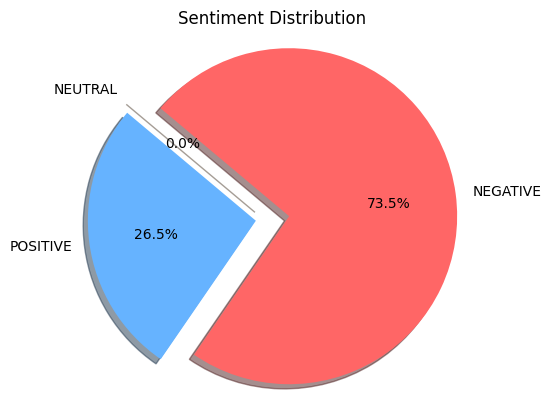

In [24]:
print(f"Total sentences: {total_sentences}")
print(f"Positive sentences: {percentages['POSITIVE']:.2f}%")
print(f"Negative sentences: {percentages['NEGATIVE']:.2f}%")
print(f"Neutral sentences: {percentages['NEUTRAL']:.2f}%")


labels = list(percentages.keys())
sizes = list(percentages.values())
colors = ['#66b3ff','#ff6666','#ffcc99']
explode = (0.1, 0.1, 0.1)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title("Sentiment Distribution")
plt.show()